# **Password Strength Classifier** **Dataset** 
The task is to check Password strength using ML model. Which shows three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong. Strength of the password based on rules(such as containing digits, special symbols , etc.)

Dataset Contains - 2 Columns(Password and Strength)

Password - 670k unique values for password collected online

Strength - three values(0 , 1 , 2) 

## Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

## Loading Data

In [59]:
data = pd.read_csv("/content/drive/My Drive/MLFA Datasets/password_strength_dataset.csv",',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [60]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [61]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


Dropping Null Values in dataset

In [0]:
data.dropna(inplace=True)

In [0]:
data = shuffle(data)

Reset the index after dropping null values and re-shuffling it

In [0]:
data.reset_index(drop=True,inplace=True)

Here Checking the strength of respected Passwords

In [0]:
y = data['strength']

In [66]:
y


0         1
1         1
2         1
3         1
4         1
         ..
669634    1
669635    1
669636    1
669637    2
669638    1
Name: strength, Length: 669639, dtype: int64

In [67]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: strength, dtype: int64

In [0]:
X = data['password']

In [69]:
data

,password,strength
0,bosz0e02e,1
1,elgekg300,1
2,nqpygieo07,1
3,d83eei72,1
4,89a055463,1
...,...,...
669634,knizar322,1
669635,computer876,1
669636,swastihutami7,1
669637,5WwCURDYxMQ1ao6b,2


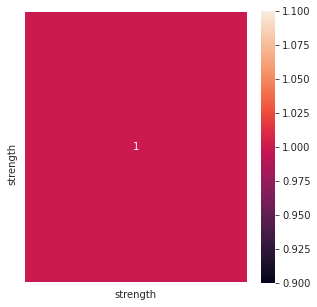

In [70]:
corrdf = data.corr('pearson')

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(corrdf, annot=True, linewidths=.5, ax=ax)

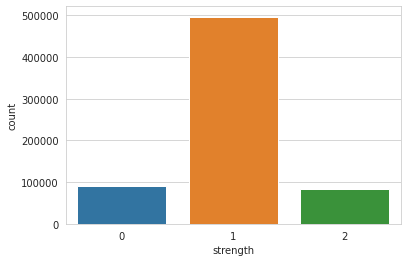

In [71]:
#sns.set_style('whitegrid')
sns.countplot(x='strength',data=data)

Now, we shall construct the Characters, Tokenize it using Tfid , and vectorize it separatly.

In [0]:
def words_to_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [0]:
vectorizer=TfidfVectorizer(tokenizer=words_to_char)
X=vectorizer.fit_transform(X)

In [74]:
X.shape

(669639, 153)

In [75]:
vectorizer.vocabulary_

{'\x01': 0,
 '\x02': 1,
 '\x04': 2,
 '\x05': 3,
 '\x06': 4,
 '\x08': 5,
 '\x0e': 6,
 '\x0f': 7,
 '\x10': 8,
 '\x11': 9,
 '\x12': 10,
 '\x13': 11,
 '\x16': 12,
 '\x17': 13,
 '\x18': 14,
 '\x19': 15,
 '\x1b': 16,
 '\x1c': 17,
 '\x1d': 18,
 '\x1e': 19,
 ' ': 20,
 '!': 21,
 '"': 22,
 '#': 23,
 '$': 24,
 '%': 25,
 '&': 26,
 '(': 27,
 ')': 28,
 '*': 29,
 '+': 30,
 '-': 31,
 '.': 32,
 '/': 33,
 '0': 34,
 '1': 35,
 '2': 36,
 '3': 37,
 '4': 38,
 '5': 39,
 '6': 40,
 '7': 41,
 '8': 42,
 '9': 43,
 ';': 44,
 '<': 45,
 '=': 46,
 '>': 47,
 '?': 48,
 '@': 49,
 '[': 50,
 '\\': 51,
 ']': 52,
 '^': 53,
 '_': 54,
 '`': 55,
 'a': 56,
 'b': 57,
 'c': 58,
 'd': 59,
 'e': 60,
 'f': 61,
 'g': 62,
 'h': 63,
 'i': 64,
 'j': 65,
 'k': 66,
 'l': 67,
 'm': 68,
 'n': 69,
 'o': 70,
 'p': 71,
 'q': 72,
 'r': 73,
 's': 74,
 't': 75,
 'u': 76,
 'v': 77,
 'w': 78,
 'x': 79,
 'y': 80,
 'z': 81,
 '{': 82,
 '|': 83,
 '}': 84,
 '~': 85,
 '\x7f': 86,
 '\x81': 87,
 '\x8d': 88,
 '\xa0': 89,
 '¡': 90,
 '¢': 91,
 '¤': 92,
 '¦': 9

In [76]:
data.iloc[0][0]

'bosz0e02e'

Get tfidf vectors for passwords and print their scores


In [77]:
feature_names = vectorizer.get_feature_names()
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
0,0.557197
e,0.482558
z,0.365610
b,0.344739
s,0.280541
...,...
\,0.000000
],0.000000
^,0.000000
_,0.000000


Splitting the dataset into Test and Train 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Application of Logistic Regression Algorithm to Classify the Password Strength with their scores and Training it.

Choosed Multi_class as "ovr" cause of Binary problem is fit for each label.

solver as "lbfgs" It approximates the second derivative matrix updates with gradient evaluations.

Iterations = 10000
Learning Rate = 0.005

In [79]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr',solver='lbfgs',max_iter=10000,tol=0.005)
log_class.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.005, verbose=0,
                   warm_start=False)

Test Accuracy 

In [80]:
print(log_class.score(x_test,y_test))

0.8109133265635267


Training Accuracy

In [81]:
print(log_class.score(x_train,y_train))

0.8124548497230784


Check your Password strength 
If 

[0] --> Poor Password, Gotta Change!

   [1] --> Good Password

   [2] --> Extraordinary Password, You make sick for Hackers to hack haha

In [82]:
X_predict=np.array(["Plk123@!$"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[2]


**Conclusion:** We could achieve a training accuray of 81% using a simple LogisticRegression model. And Build a Application Out of it.  

**Future Steps :** Can build an End to End Solution for any Application where you need to register/sign-in.